In [10]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import math
from datetime import datetime
import numpy as np
import warnings
from pprint import pprint
warnings.filterwarnings('ignore')
%matplotlib inline

In [11]:
# plots style
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

In [12]:
mmt = pd.read_csv('data/mmt_prepared.csv')

Text(0.5,0,'Średnia ocena filmu')

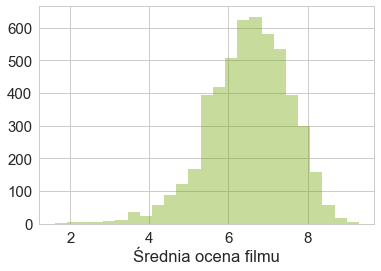

In [38]:
# plots style
sns.set(font_scale=1.5)
sns.set_style('whitegrid'), 
sns.distplot(mmt['averageRating'], color="#74A608", bins=25,kde=False)
#plt.title("Histogram średniej oceny")
plt.xlabel("Średnia ocena filmu")


(array([  3.,   6.,   5.,   6.,   9.,  11.,  36.,  23.,  57.,  89., 122.,
        168., 393., 417., 507., 623., 634., 582., 534., 393., 300., 158.,
         56.,  17.,   5.]),
 array([1.6  , 1.908, 2.216, 2.524, 2.832, 3.14 , 3.448, 3.756, 4.064,
        4.372, 4.68 , 4.988, 5.296, 5.604, 5.912, 6.22 , 6.528, 6.836,
        7.144, 7.452, 7.76 , 8.068, 8.376, 8.684, 8.992, 9.3  ]),
 <a list of 25 Patch objects>)

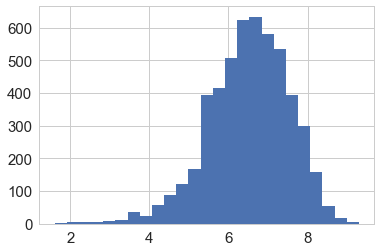

In [39]:
plt.hist(mmt['averageRating'], bins=25)

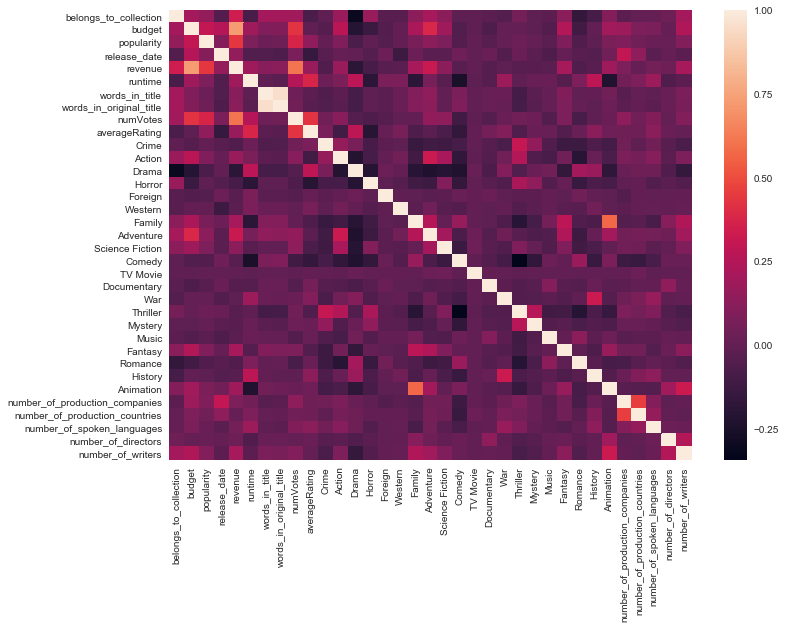

In [40]:
#Macierz korelacji
corr = mmt.corr()
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, )

In [13]:
from sklearn.ensemble import ExtraTreesRegressor

X = mmt.drop('averageRating', axis=1)
y = mmt['averageRating']

cls = ExtraTreesRegressor()
cls.fit(X, y)

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [15]:
feat_importances = pd.Series(cls.feature_importances_, index=X.columns)

In [16]:
import numpy as np
np.mean(feat_importances)

0.02941176470588235

In [17]:
feat_importances[feat_importances > 0.029]

budget          0.085372
popularity      0.038389
release_date    0.069198
revenue         0.032799
runtime         0.093816
numVotes        0.261792
Drama           0.077189
dtype: float64

In [18]:
ind_largest = feat_importances.nlargest(15).index
ind_smallest = feat_importances.nsmallest(18).index
ind = ind_largest.append(ind_smallest[::-1])

In [19]:
font = {'family' : 'normal',
                'size'   : 44}

In [20]:
# plots style
sns.set(font_scale=1.5)
sns.set_style('white')

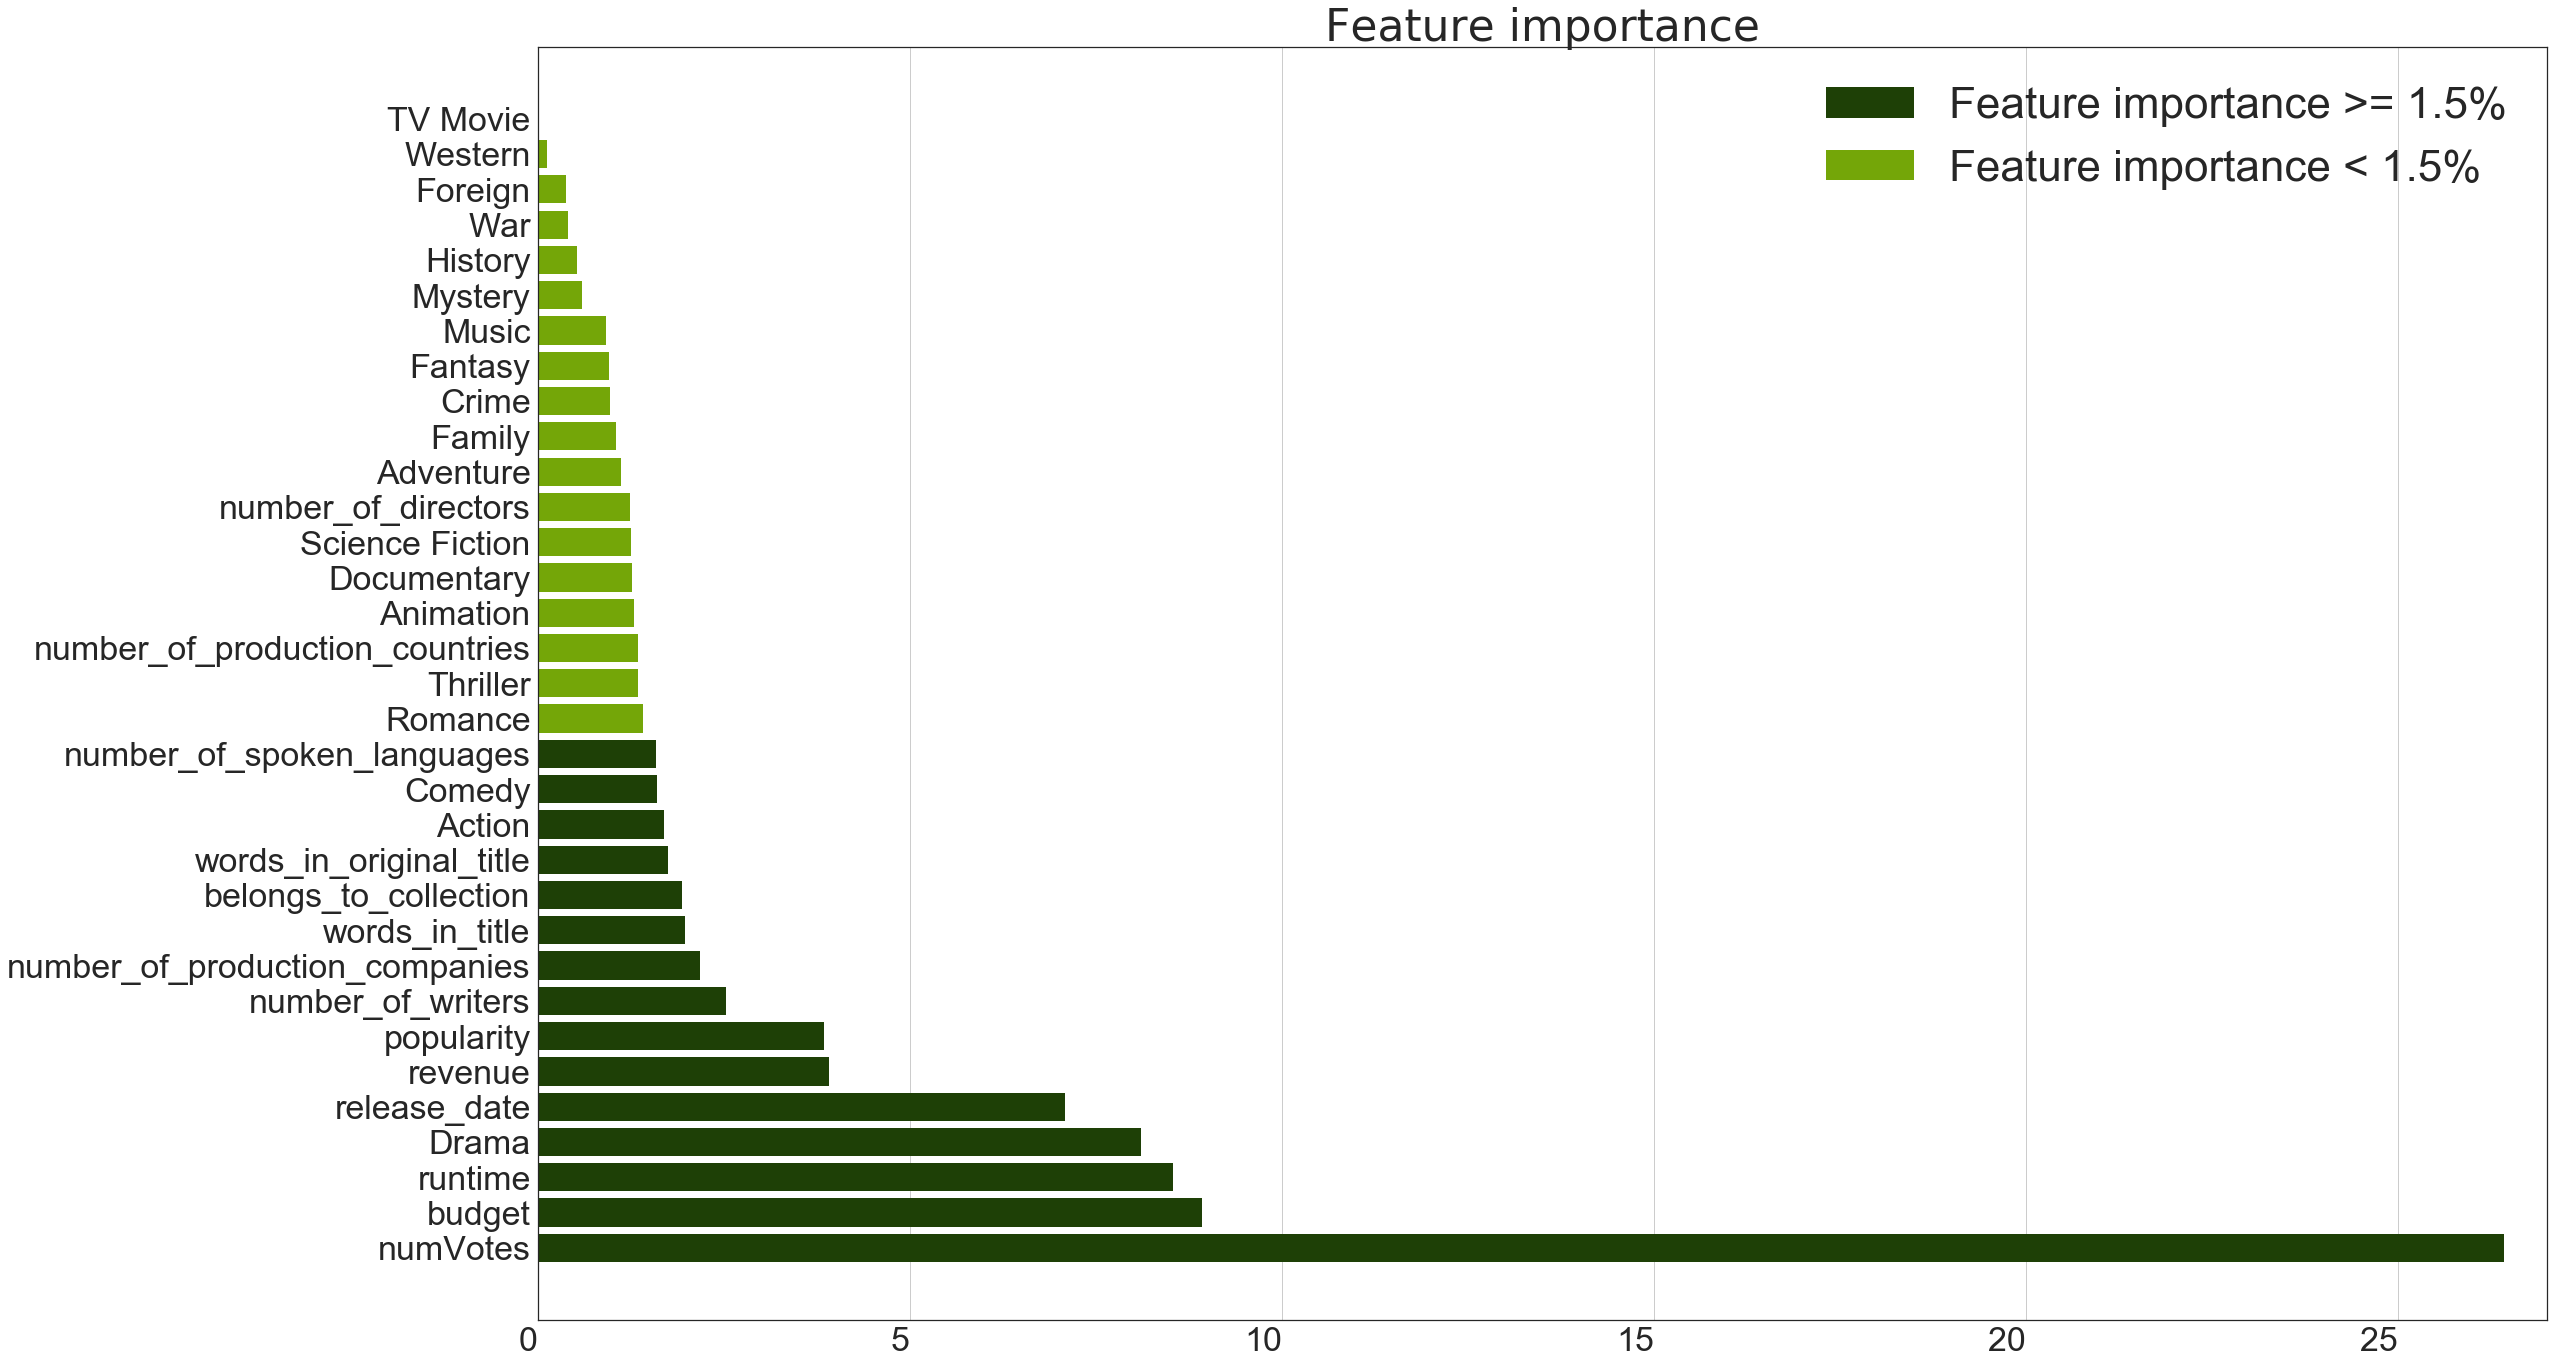

In [50]:

f, ax = plt.subplots(1,1, figsize=(36,26))

ax.set_xlim(0, 27)
f.autofmt_xdate()

ggg = plt.barh(ind_largest, feat_importances.nlargest(15)*100, alpha=1,height=0.8, color='#1E4006', label='Feature importance >= 1.5%')
gg = plt.barh(ind_smallest, feat_importances.nsmallest(18)[::-1]*100, alpha=1,height=0.8,  color='#74A608', label='Feature importance < 1.5%')

ax.xaxis.grid() # horizontal lines
ax.set_title('Feature importance', fontdict=font)
ax.set_yticklabels(ind)

ax.legend(prop={'size': 44, 'style': 'normal'})

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(34) 
    tick.label.set_rotation(0)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(34) 

plt.savefig('images/feature_importance.jpg')

In [51]:
len(feat_importances[feat_importances < 0.015])

18

In [52]:
len(feat_importances[feat_importances > 0.015])

16

In [53]:
sum(feat_importances[feat_importances > 0.015])

0.8374443147147727

In [21]:
X_to_delete = mmt.drop('averageRating', axis=1).columns[feat_importances < 0.015]

In [22]:
mmt.drop(X_to_delete, axis=1, inplace=True)

In [23]:
34*0.3

10.2

In [24]:
mmt.to_csv('data/mmt_selected.csv', index=False)

In [58]:
mmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154 entries, 0 to 5153
Data columns (total 17 columns):
belongs_to_collection             5154 non-null int64
budget                            5154 non-null int64
popularity                        5154 non-null float64
release_date                      5154 non-null int64
revenue                           5154 non-null int64
runtime                           5154 non-null float64
words_in_title                    5154 non-null int64
words_in_original_title           5154 non-null int64
numVotes                          5154 non-null int64
averageRating                     5154 non-null float64
Action                            5154 non-null int64
Drama                             5154 non-null int64
Horror                            5154 non-null int64
Comedy                            5154 non-null int64
number_of_production_companies    5154 non-null int64
number_of_spoken_languages        5154 non-null int64
number_of_writers      

Usunięcie cech, które mają mniejsze fi od średniej

In [30]:
X_to_delete = mmt.drop('averageRating', axis=1).columns[feat_importances < np.mean(feat_importances)]

In [31]:
mmt.drop(X_to_delete, axis=1, inplace=True)

In [32]:
mmt.to_csv('data/mmt_selected_more.csv', index=False)

In [34]:
mmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5154 entries, 0 to 5153
Data columns (total 8 columns):
budget           5154 non-null int64
popularity       5154 non-null float64
release_date     5154 non-null int64
revenue          5154 non-null int64
runtime          5154 non-null float64
numVotes         5154 non-null int64
averageRating    5154 non-null float64
Drama            5154 non-null int64
dtypes: float64(3), int64(5)
memory usage: 322.2 KB
